# Comparison between BB spectrum and PHOENIX model for M-type dwarf

***

Let us do some imports and make fonts more of latex-style in figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.linewidth']   = 0.75

First of all we need to open the file with absolute spectrum.

In [2]:
lam, flux = np.loadtxt('spectrum.spec',unpack=True,usecols=(0,1))

Now we need to define the function that return BB model in the same units as the absolute spectrum above, that is, in erg/cm^2/s/A.

In [3]:
def black_body_spectrum(wavelength_angstrom, temperature):
    """
    Calculate the black body spectrum at a given wavelength and temperature.
    
    Parameters:
    wavelength_angstrom (float): Wavelength in Ångströms.
    temperature (float): Temperature in Kelvin.
    
    Returns:
    float: Spectral radiance in erg/cm^2/s/Å.
    """
    # Constants in cgs units
    h = 6.626e-27  # Planck's constant in erg·s
    c = 2.998e10   # Speed of light in cm/s
    k_B = 1.381e-16  # Boltzmann's constant in erg/K
    
    # Convert wavelength from Ångströms to centimeters
    wavelength_cm = wavelength_angstrom * 1e-8
    
    # Calculate the spectral radiance B(λ, T)
    exponential_part = np.exp((h * c) / (wavelength_cm * k_B * temperature))
    spectral_radiance = (2 * h * c**2) / (wavelength_cm**5 * (exponential_part - 1))
    
    return spectral_radiance*1e-8*4

bb_spectrum = black_body_spectrum(wavelength_angstrom=lam, temperature=3000.0)

Let us plot these two spectra and highlight the TESS passband, assuming that its transmission function is uniform from 5800 to 10000 Angstroms...

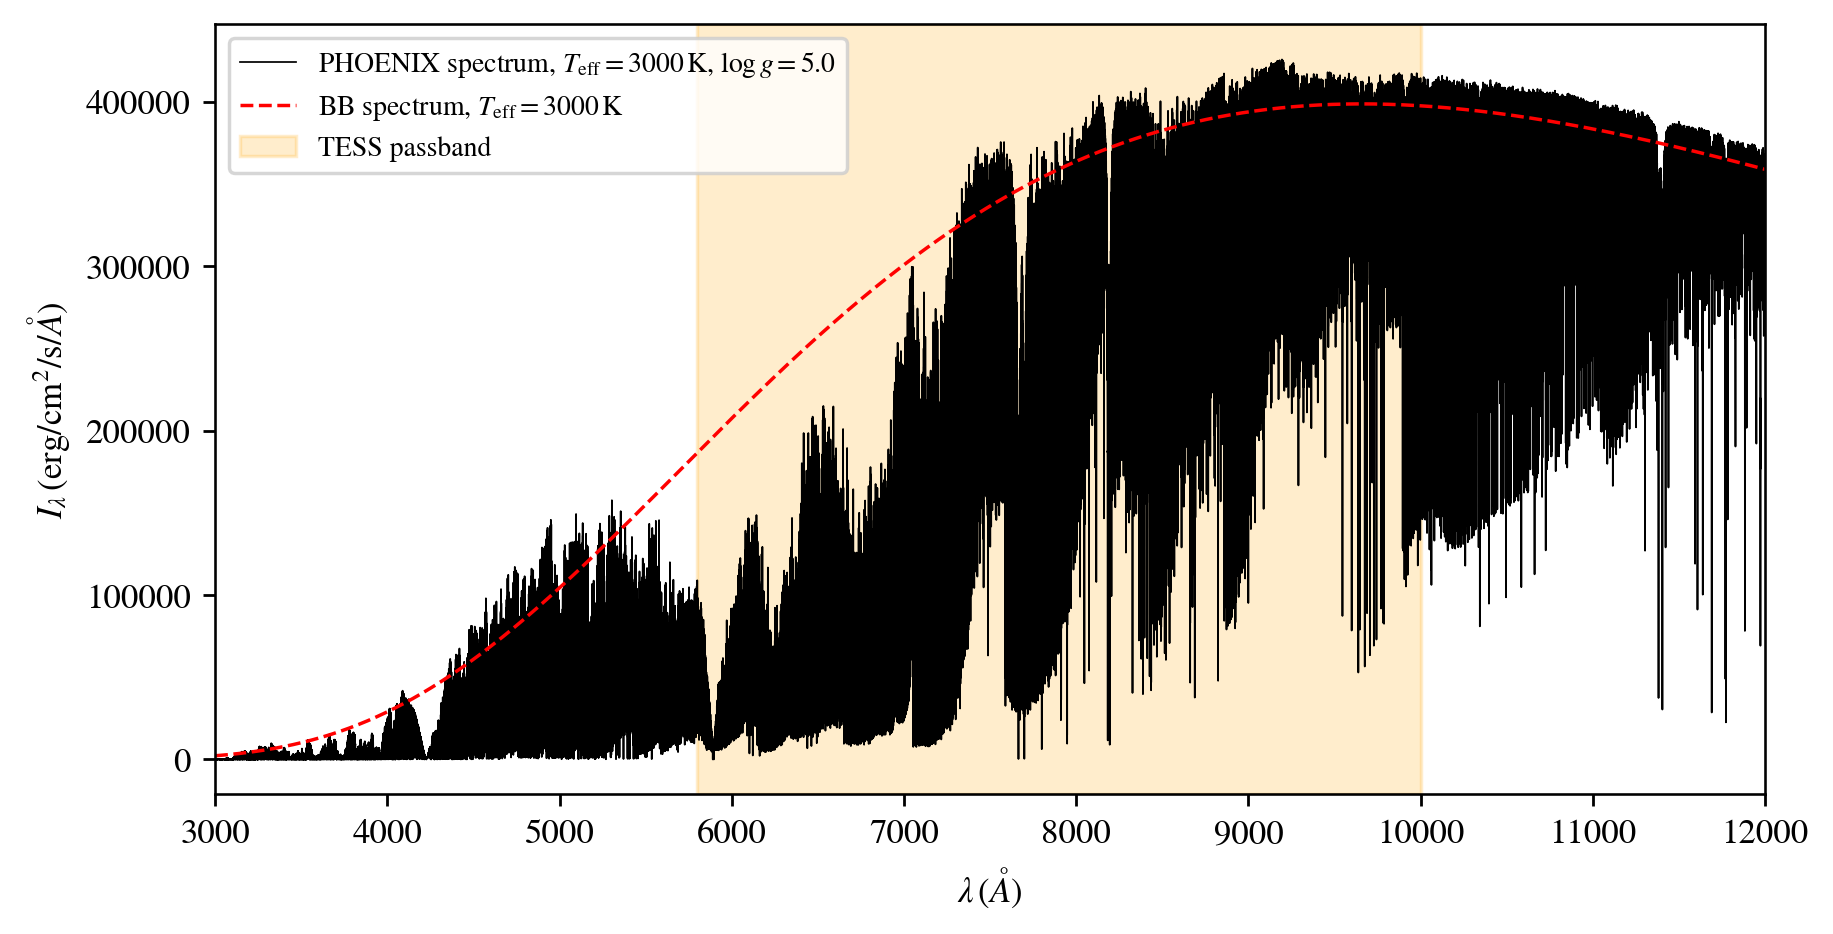

In [4]:
plt.figure(figsize=(8,4),dpi=250)
plt.plot(lam,flux,'k-',linewidth=0.5,label=r'PHOENIX spectrum, $T_{\rm eff}=3000\,$K, $\log g=5.0$')
plt.plot(lam,bb_spectrum,'r--',linewidth=1,label=r'BB spectrum, $T_{\rm eff}=3000\,$K')
plt.gca().axvspan(5800,10000,color='orange',alpha=0.2,label='TESS passband')
plt.xlabel(r'$\lambda\,(\AA)$')
plt.ylabel(r'$I_\lambda\,$(erg/cm$^2$/s/$\AA$)')
plt.xlim(3000,12000)
plt.legend(fontsize=8)
plt.show()

It can be easily seen that the BB spectrum is not a good approximation in the TESS passband for an M-type dwarf. Lets investigate what is the ratio between passband integrated fluxes for BB and PHOENIX model, $F_{\rm bb}/F_{\rm phoenix}$. To do this, we need to integrate both spectra over the range of $\lambda$ which is highlighted in the figure above. We also have to remember that our detectors are photon-counting so we have to multiply fluxes by $\lambda^{-1}$.

$$\frac{F_{\rm bb}}{F_{\rm phoenix}}\Bigg|_{\rm TESS}=\frac{\int\limits_{5800}^{10000}f_{\rm bb}(\lambda)\lambda^{-1}\,{\rm d}\lambda}{\int\limits_{5800}^{10000}f_{\rm phoenix}(\lambda)\lambda^{-1}\,{\rm d}\lambda}$$

In [5]:
mask    = (lam>5800)&(lam<10000)
f_ratio = np.trapz( bb_spectrum[mask]/lam[mask] , x=lam[mask] ) / np.trapz( flux[mask]/lam[mask] , x=lam[mask] )

Finally, we obtain the value of $F_{\rm bb}/F_{\rm phoenix}$

In [6]:
print(f_ratio)

1.6172267470510033


This value tells us that using BB model has severe limitations when it comes to the interpretation of optimized $T_{\rm eff}$ in PHOEBE. BB model with the same effective temperature gives about 60% larger signal compared to the realistic model atmosphere. This is a lot! It means that (at least in the case of M-type dwarfs and TESS passband), using the BB model leads to $T_{\rm eff}$s which cannot be directly compared with spectroscopic values. They are just a measure of the passband luminosity and may significantly differ from spectroscopic $T_{\rm eff}$s.